## Class learn

Instead of trying to predict 'seal' vs 'not seal', let's try to predict the _class_ of seal. It'll be one of **whitecoat**, **moulted**, **double** or **dead**.

In [1]:
from PIL import Image
from glob import glob
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

Make a function for computing luminance:

$$Y = 0.2126 R + 0.7152 G + 0.0722 B$$

In [2]:
def luminance(r, g, b):
    return 0.2126*r + 0.7152*g + 0.0722*b

Make lists of ravelled arrays.

In [3]:
def get_data(pathname):
    files = []
    for fname in glob(pathname):
        img = Image.open(fname)  # Image
        ima = np.asarray(img)    # array
        imy = luminance(*ima.T)   # luminance
        files.append(imy.ravel())
    return files

Read the image tiles.

In [4]:
pathname = '/home/matt/Downloads/seals/StitchMICE_ORKlh16_3_1104_CP_FINAL_tiles/pos/*.tif'
pos = get_data(pathname)

In [5]:
len(pos)

3041

Read the classes.

In [6]:
with open('/home/matt/Downloads/seals/StitchMICE_ORKlh16_3_1104_CP_FINAL_classes.txt') as f:
    cls = f.readlines()
    
cls = [c.strip() for c in cls]

In [7]:
X = np.array(pos)
y = np.array(cls)

In [8]:
X.shape, y.shape

((3041, 6400), (3041,))

## Train and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

## Random forest

Again, start with something that's likely to do okay.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(n_estimators=16, n_jobs=4)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
clf.score(X_train, y_train), clf.score(X_val, y_val)

(0.9929824561403509, 0.8817345597897503)

In [18]:
y_pred = clf.predict(X_val)

In [26]:
y_val.shape

(761,)

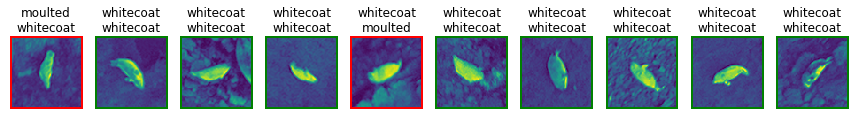

In [25]:
offset = 640
number = 10

fig, axs = plt.subplots(ncols=number, figsize=(15,1.5))
for i in range(number):
    idx = offset + i
    xa = X_val[idx].reshape(80, 80)
    axs[i].imshow(xa)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"{y_val[idx]}\n{y_pred[idx]}")
    c = 'green' if (y_pred[idx] == y_val[idx]) else 'red'
    for spine in axs[i].spines.values():
        spine.set_edgecolor(c)
        spine.set_linewidth(2)